<h2 style="font-family:san-serif;font-size:30px;color:green;font-weight:bold;text-align:right">Libraries Importing</h2>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import os
for dirname,_,filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input\Covid Dataset.csv


<h2 style="font-family:san-serif;font-size:30px;color:green;font-weight:bold;text-align:right">Data Loading</h2>

In [2]:
covid = pd.read_csv('input/Covid Dataset.csv')

***Preliminary Analysis***

In [3]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [4]:
covid.shape

(5434, 21)

<h2 style="font-family:san-serif;font-size:30px;color:green;font-weight:bold;text-align:right">Data Preprocessing</h2>

In [5]:
covid.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

## EDA(Exploratory Data Analysis)

<AxesSubplot:xlabel='COVID-19', ylabel='count'>

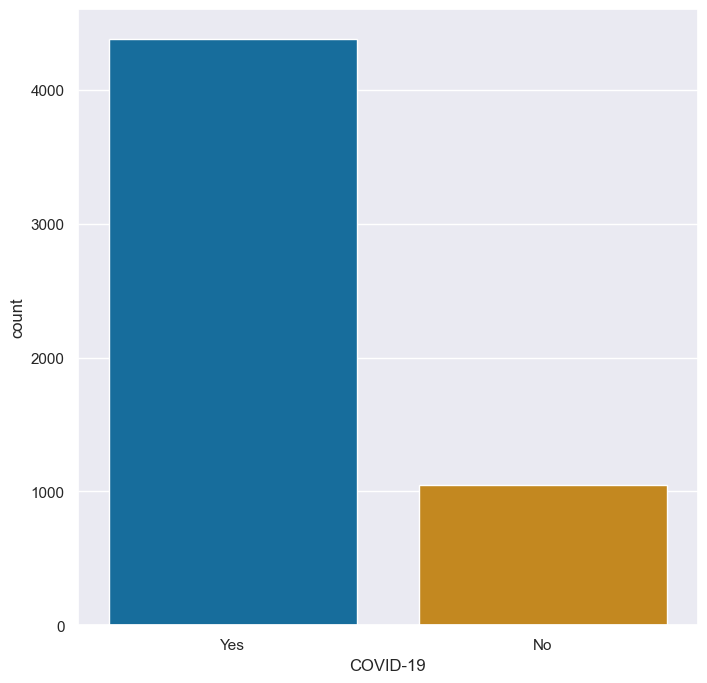

In [7]:
sns.countplot(x='COVID-19',data=covid)

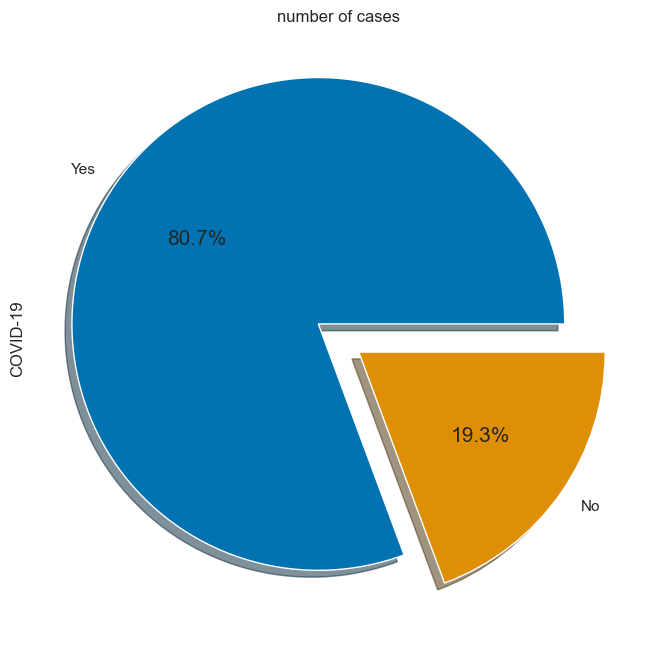

In [8]:
covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

### Breathing Problem

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

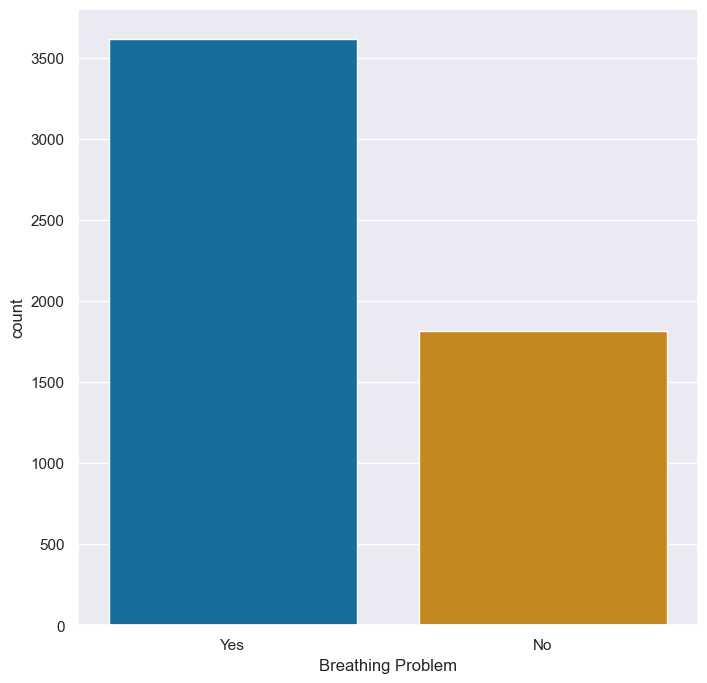

In [9]:
sns.countplot(x='Breathing Problem',data=covid)

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

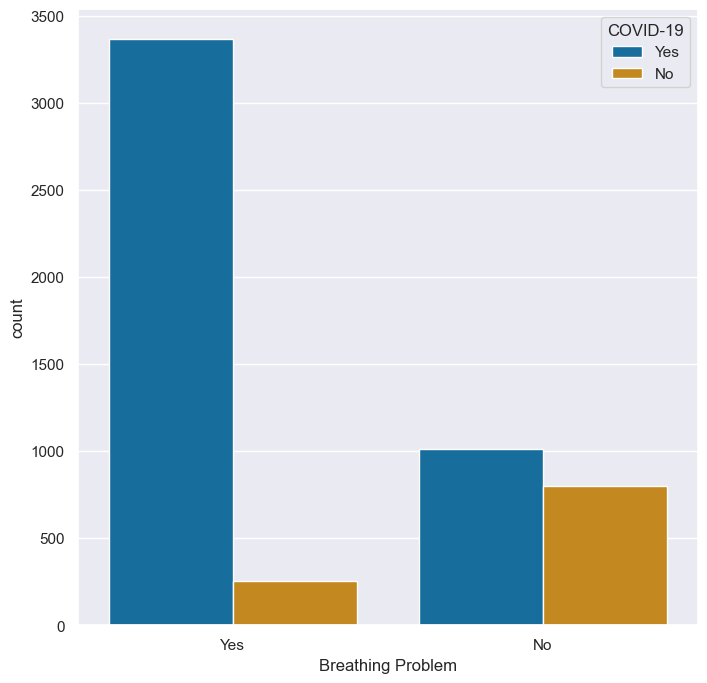

In [10]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid)

## Fever

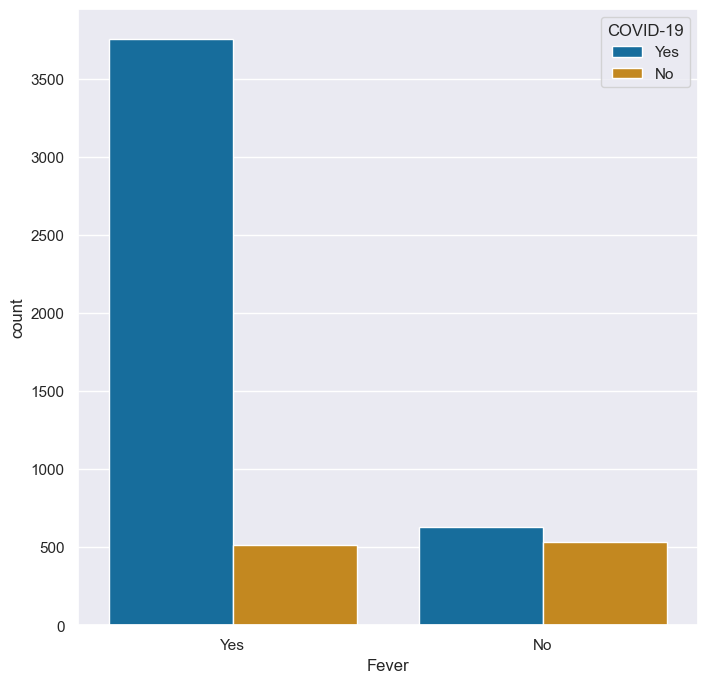

In [11]:
sns.countplot(x='Fever',hue='COVID-19',data=covid);

## Dry Cough

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

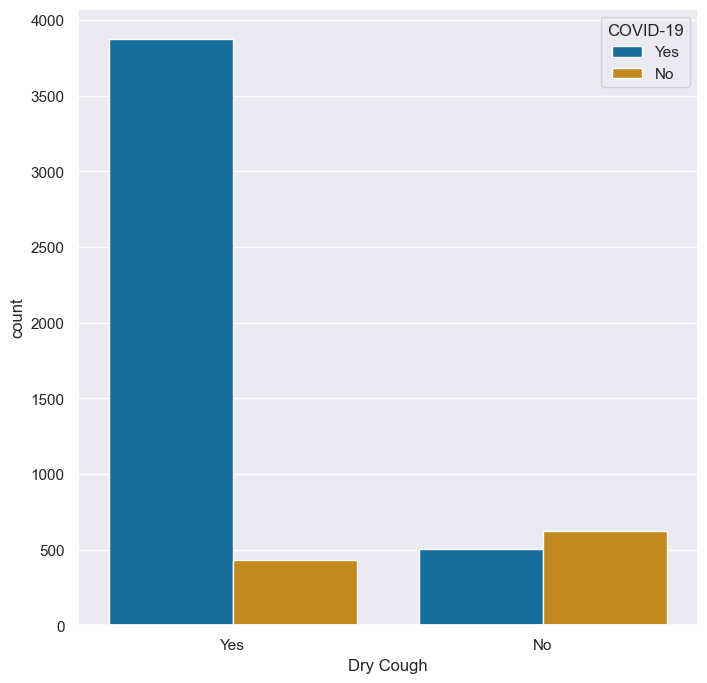

In [12]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=covid)

## Sore throat

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

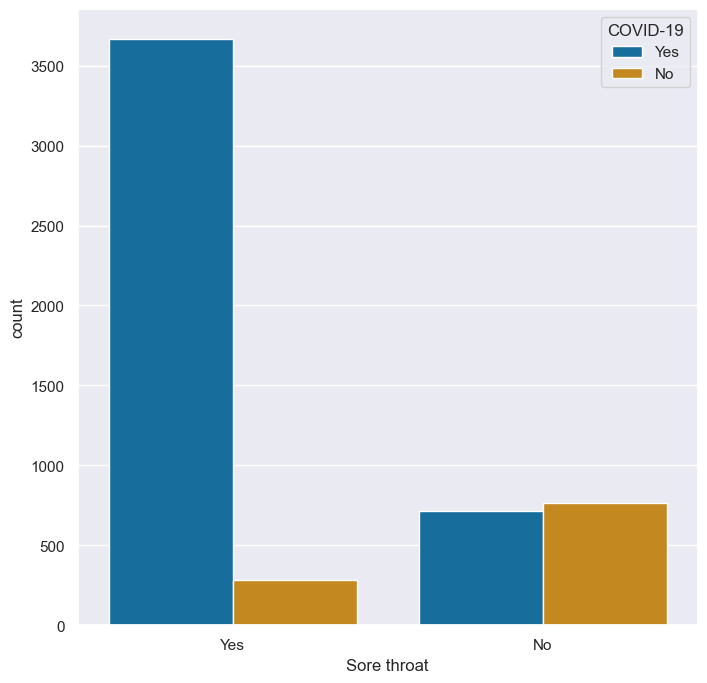

In [13]:
sns.countplot(x='Sore throat',hue='COVID-19',data=covid)

## Feature Transformation

In [14]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [15]:
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])

In [16]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


In [17]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int32
 1   Fever                                    5434 non-null   int32
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int32
 5   Asthma                                   5434 non-null   int32
 6   Chronic Lung Disease                     5434 non-null   int32
 7   Headache                                 5434 non-null   int32
 8   Heart Disease                            5434 non-null   int32
 9   Diabetes                                 5434 non-null   int32
 10  Hyper Tension                            5434 non-null   int32
 11  Fati

## Data Oversampling

In [18]:
covid['COVID-19'].value_counts()

1    4383
0    1051
Name: COVID-19, dtype: int64

In [19]:
from sklearn.utils import resample

oversampled=[]
for label in covid['COVID-19'].unique().tolist():
    label_df=covid.loc[covid['COVID-19']==label]
    oversampled.append(resample(label_df,n_samples=max(covid['COVID-19'].value_counts())))
df=pd.concat(objs=oversampled,ignore_index=True)
df=df.sample(frac=1).reset_index(drop=True)

In [20]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
2,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,0,1


In [21]:
df['COVID-19'].value_counts()

0    4383
1    4383
Name: COVID-19, dtype: int64

<h2 style="font-family:san-serif;font-size:30px;color:green;font-weight:bold;text-align:right">Data Splitting</h2>

In [22]:
X=df.drop(labels='COVID-19',axis=1)
X.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0
1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0
2,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,0


In [23]:
y=df[['COVID-19']]
y.head()

,COVID-19
0,0
1,0
2,0
3,0
4,1


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7012, 20) (1754, 20) (7012, 1) (1754, 1)


In [25]:
X_train.to_csv('splitted_data/X_train.csv',index=False)
X_test.to_csv('splitted_data/X_test.csv',index=False)
y_train.to_csv('splitted_data/y_train.csv',index=False)
y_test.to_csv('splitted_data/y_test.csv',index=False)

---